<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

Ce notebook est la suite de celui sur le traitement des descriptions. On récupère les données nettoyées pour les catégories des produits.

## Imports

In [1]:
# Chargement des librairies
# Standard
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from matplotlib.image import imread
from PIL import Image as PilImage

# Deep Learning - TensorFlow/Keras
os.environ["KERAS_BACKEND"] = "torch"
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inceptionresnetv2
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet201
from tensorflow.keras.utils import to_categorical

# Custom Modules
from Deveau_Estelle_4_IMG_func_042024 import *

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_txt_faisabilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'Deveau_Estelle_3_notebook_img_faisabilite_042024.ipynb',
 'Deveau_Estelle_4_IMG_func_042024.py',
 'Deveau_Estelle_5_notebook_img_classification_042024.ipynb',
 'model_augmented_best.weights.h5',
 'model_augmented_data_best.weights.h5',
 'model_best.keras',
 'model_best.weights.h5',
 'model_densenet201_best.weights.h5',
 'model_inceptionresnetv2_best.weights.h5',
 'model_vgg16_best.weights.h5',
 'OC_projet6.pptx',
 'pythonProject',
 'svg',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'Weather_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/Cleaned/")

['data.csv']

In [4]:
path     = "./data/Cleaned/"
filename = "data.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
path     = "./data/Sources/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


# Classification supervisée

In [7]:
cols_to_keep = ['uniq_id', 'product_category']
df = data[cols_to_keep]
df.head(5)

,uniq_id,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing


In [8]:
image_paths = [f"{path}{uid}.jpg" for uid in df['uniq_id']]

# Encodage des catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(df['product_category'])
category_names = label_encoder.classes_

## Séparation des jeux de données (train, val, test)

In [9]:
y = to_categorical(categories_encoded, 7)

In [10]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
# Diviser les chemins d'image et les étiquettes
paths_train, paths_test, y_train, y_test = train_test_split(image_paths, y, test_size=0.2, random_state=42)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.25, random_state=42)

In [12]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

## Evaluation des modèles sélectionnés

In [14]:
# Définir le seuil à un niveau supérieur spécifique
PilImage.MAX_IMAGE_PIXELS = 100000000

### VGG16

In [15]:
# Préparation des données
X_train_vgg16, X_val_vgg16, X_test_vgg16 = prepare_data(paths_train, paths_val, paths_test, preprocess_vgg16,
                                                        target_size=(224, 224, 3))

In [16]:
# Création du modèle
model_vgg16 = create_model_fct(base_model_name='VGG16')

In [17]:
# Entraînement du modèle
model_vgg16, history_vgg16, duration_vgg16 = train_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16, y_val,
                                                         model_save_path="./model_vgg16_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3233 - loss: 7.1790
Epoch 1: val_loss improved from inf to 1.48538, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.3296 - loss: 7.0844 - val_accuracy: 0.7762 - val_loss: 1.4854
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6791 - loss: 2.4524
Epoch 2: val_loss improved from 1.48538 to 1.29120, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.6792 - loss: 2.4485 - val_accuracy: 0.8000 - val_loss: 1.2912
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7447 - loss: 1.5811
Epoch 3: val_loss improved from 1.29120 to 1.12036, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.7456 - loss: 1.5743 - val_accuracy: 0.8000 - val_loss: 1.1204
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8081 - loss: 0.9852
Epoch 4: val_lo

In [18]:
# Évaluation du modèle
loss_vgg16, accuracy_vgg16, ari_score_vgg16 = evaluate_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16,
                                                             y_val, X_test_vgg16, y_test, best_weights_path="./model_vgg16_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9903 - loss: 0.0447
Training Accuracy after last epoch: 0.9921

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.7943 - loss: 0.8878
Test Accuracy after last epoch: 0.8000

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8198 - loss: 0.9141
Validation Accuracy (best): 0.8143
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8003 - loss: 0.8228
Test Accuracy (best): 0.8048
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
Adjusted Rand Index (ARI): 0.6131


### InceptionResNetV2

In [19]:
# Préparation des données
X_train_inceptionresnetv2, X_val_inceptionresnetv2, X_test_inceptionresnetv2 = prepare_data(paths_train, paths_val,
                                                                                            paths_test, preprocess_inceptionresnetv2,
                                                                                            target_size=(299, 299, 3))

In [20]:
# Création du modèle
model_inceptionresnetv2 = create_model_fct(base_model_name='InceptionResNetV2')

In [21]:
# Entraînement du modèle
model_iresnetv2, history_iressnetv2, duration_iresnetv2 = train_model(model_inceptionresnetv2, X_train_inceptionresnetv2,
                                                                      y_train, X_val_inceptionresnetv2, y_val,
                                                                      model_save_path="./model_inceptionresnetv2_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4161 - loss: 1.7388
Epoch 1: val_loss improved from inf to 0.63346, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - accuracy: 0.4233 - loss: 1.7193 - val_accuracy: 0.7762 - val_loss: 0.6335
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8230 - loss: 0.6194
Epoch 2: val_loss improved from 0.63346 to 0.50787, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.8229 - loss: 0.6192 - val_accuracy: 0.8238 - val_loss: 0.5079
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8659 - loss: 0.4298
Epoch 3: val_loss improved from 0.50787 to 0.43720, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.8649 - loss: 0.4335 - val_accuracy: 0.8619 - val_loss: 0.4372
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0

In [22]:
# Évaluation du modèle
loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2 = evaluate_model(model_iresnetv2,
                                                                                                 X_train_inceptionresnetv2,
                                                                                                 y_train, X_val_inceptionresnetv2,
                                                                                                 y_val, X_test_inceptionresnetv2,
                                                                                                 y_test,
                                                                                                 best_weights_path="./model_inceptionresnetv2_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9721 - loss: 0.1040
Training Accuracy after last epoch: 0.9651

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.9057 - loss: 0.3731
Test Accuracy after last epoch: 0.8905

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.8612 - loss: 0.3820
Validation Accuracy (best): 0.8619
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.8846 - loss: 0.3573
Test Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
Adjusted Rand Index (ARI): 0.7548


### DenseNet201

In [23]:
# Préparation des données
X_train_densenet201, X_val_densenet201, X_test_densenet201 = prepare_data(paths_train, paths_val, paths_test,
                                                                          preprocess_densenet201, target_size=(224, 224, 3))


In [24]:
# Création du modèle
model_densenet201 = create_model_fct(base_model_name='DenseNet201')


In [25]:
# Entraînement du modèle
model_densenet201, history_densenet201, duration_densenet201 = train_model(model_densenet201, X_train_densenet201, y_train,
                                                                           X_val_densenet201, y_val,
                                                                           model_save_path="./model_densenet201_best.weights.h5")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.3754 - loss: 2.0572
Epoch 1: val_loss improved from inf to 0.64170, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3835 - loss: 2.0283 - val_accuracy: 0.7857 - val_loss: 0.6417
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8201 - loss: 0.5878
Epoch 2: val_loss improved from 0.64170 to 0.53694, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8195 - loss: 0.5901 - val_accuracy: 0.8333 - val_loss: 0.5369
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.8532 - loss: 0.4571
Epoch 3: val_loss improved from 0.53694 to 0.52267, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8534 - loss: 0.4560 - val_accuracy: 0.8286 - val_loss: 0.5227
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.8990 - loss: 0.3022
Epo

In [26]:
# Évaluation du modèle
loss_densenet201, accuracy_densenet201, ari_score_densenet201 = evaluate_model(model_densenet201, X_train_densenet201,
                                                                               y_train, X_val_densenet201,
                                                                                y_val, X_test_densenet201, y_test,
                                                                               best_weights_path="./model_densenet201_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 0.9998 - loss: 0.0157
Training Accuracy after last epoch: 0.9984

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 837ms/step - accuracy: 0.8560 - loss: 0.5049
Test Accuracy after last epoch: 0.8571

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 845ms/step - accuracy: 0.8325 - loss: 0.4961
Validation Accuracy (best): 0.8476
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 838ms/step - accuracy: 0.8783 - loss: 0.3751
Test Accuracy (best): 0.8619
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 893ms/step
Adjusted Rand Index (ARI): 0.7306


### Comparaison des résultats

In [197]:
# Initialisation de la liste pour stocker les résultats
data_results = []

# Fonction pour ajouter les résultats d'un modèle au DataFrame
def add_results(model_name, loss, accuracy, ari_score, duration):
    metrics = ['Loss', 'Accuracy', 'Adjusted Rand Score', 'Duration (en heures)']
    scores = [loss, accuracy, ari_score, (duration/3600)]
    for metric, score in zip(metrics, scores):
        data_results.append({
            'Model': model_name,
            'Metric': metric,
            'Score': score
        })

In [198]:
add_results('VGG16', loss_vgg16, accuracy_vgg16, ari_score_vgg16, duration_vgg16)
add_results('InceptionResNetV2', loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2, duration_iresnetv2)
add_results('DenseNet201', loss_densenet201, accuracy_densenet201, ari_score_densenet201, duration_densenet201)

data_metrics = pd.DataFrame(data_results)

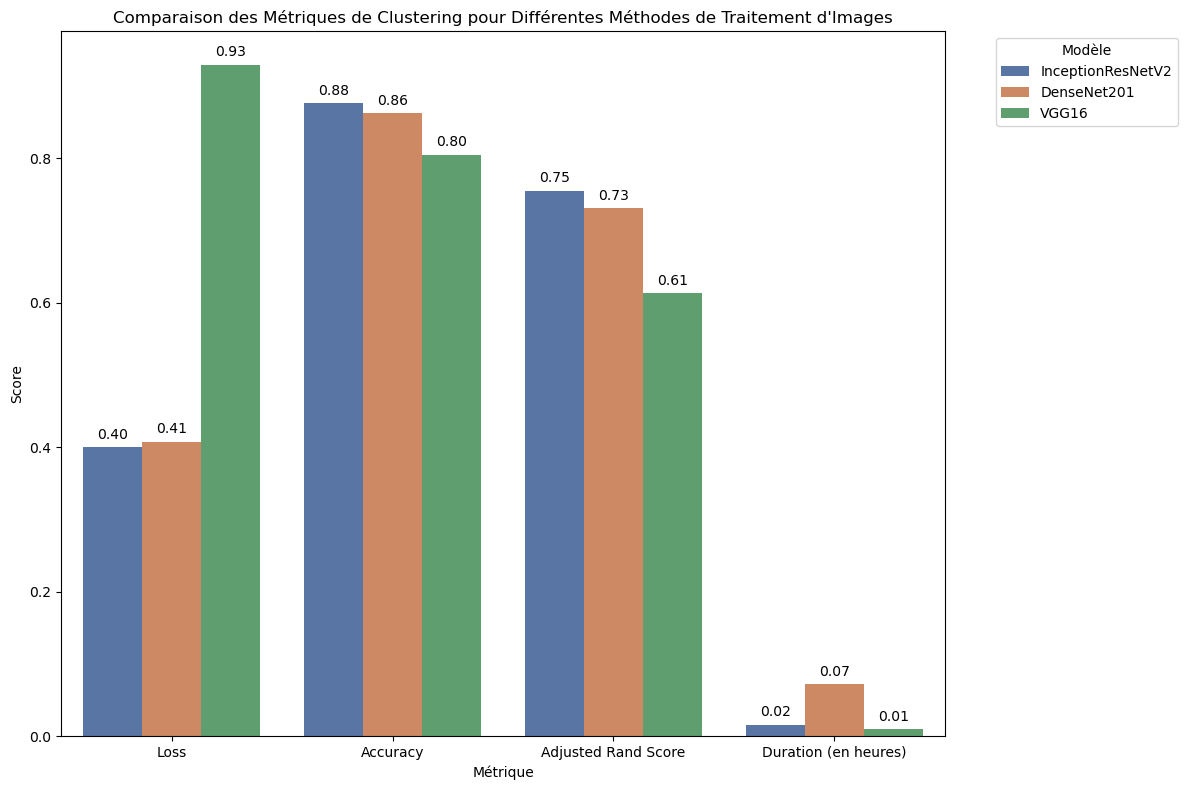

In [124]:
plot_model_performance(data_metrics)

# Optimisation

## Hyper paramètres

In [30]:
# Entraînement du modèle
best_model, duration_best = test_hyperparameters(model_inceptionresnetv2, X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2,
                                                 y_val, "./model_best.weights.h5")

Testing with learning_rate=0.01, batch_size=16, epochs=50
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 14.
Finished 0.01, 16 with val_accuracy=0.8666666746139526, duration=494.57583498954773
Testing with learning_rate=0.01, batch_size=32, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.01, 32 with val_accuracy=0.8571428656578064, duration=36.69457149505615
Testing with learning_rate=0.01, batch_size=64, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.01, 64 with val_accuracy=0.8809523582458496, duration=256.50888872146606
Testing with learning_rate=0.001, batch_size=16, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.001, 16 with val_accuracy=0.8809523582458496, duration=168.98686337471008
Testing with learning_rate=0.001, batch_size=32, epochs=50
Epoch 5: early stopping
Restoring mode

In [31]:
# Évaluation du modèle
loss_best, accuracy_best, ari_score_best = evaluate_model(best_model,
                                                          X_train_inceptionresnetv2,
                                                          y_train, X_val_inceptionresnetv2,
                                                          y_val, X_test_inceptionresnetv2,
                                                          y_test, best_weights_path="none")

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8747 - loss: 0.7072
Validation Accuracy (best): 0.8810
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8798 - loss: 0.6367
Test Accuracy (best): 0.8714
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Adjusted Rand Index (ARI): 0.7470


In [199]:
add_results('InceptionResNetV2(HP)', loss_best, accuracy_best, ari_score_best, duration_best)
data_metrics = pd.DataFrame(data_results)

In [126]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.929100
1,VGG16,Accuracy,0.804762
2,VGG16,Adjusted Rand Score,0.613075
3,VGG16,Duration (en heures),0.009636
4,InceptionResNetV2,Loss,0.400183
5,InceptionResNetV2,Accuracy,0.876190
6,InceptionResNetV2,Adjusted Rand Score,0.754794
7,InceptionResNetV2,Duration (en heures),0.015675
8,DenseNet201,Loss,0.407489
9,DenseNet201,Accuracy,0.861905


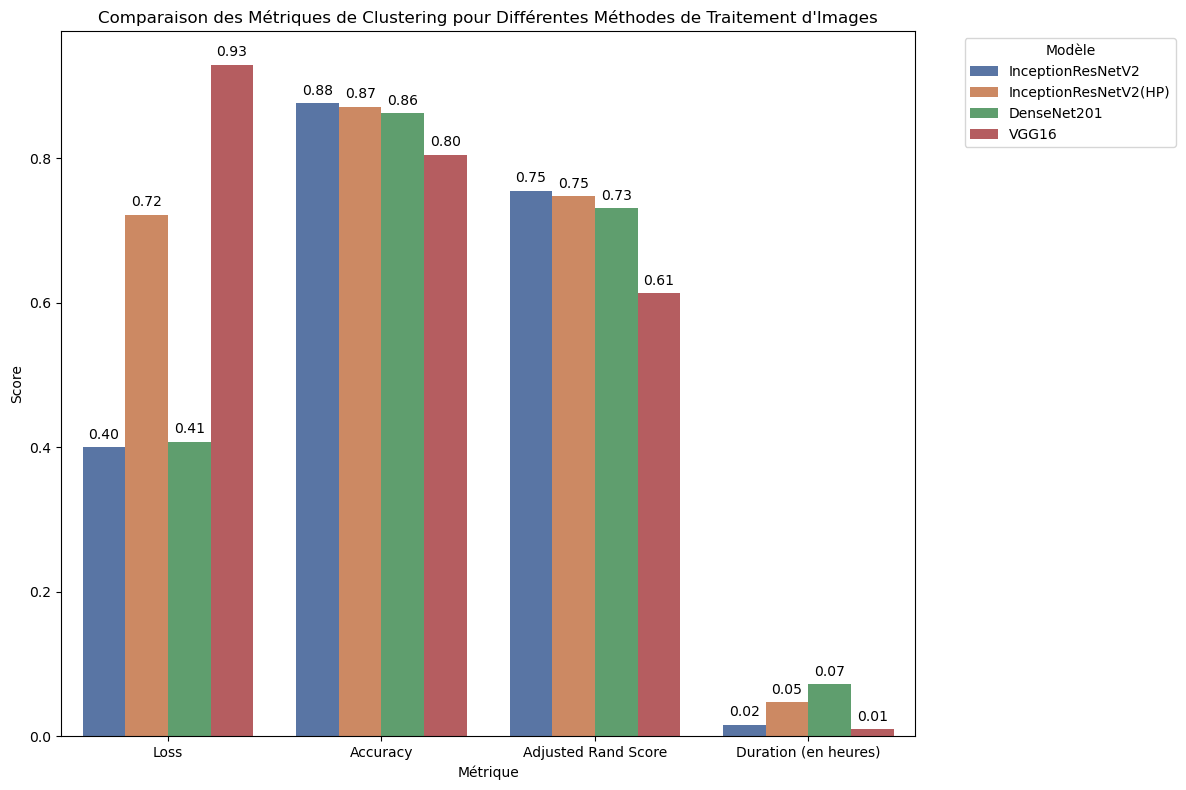

In [200]:
plot_model_performance(data_metrics)

## Data Augmentation

### ImageDataGenerator

In [35]:
# Préparez les générateurs avec la data augmentation
train_generator, validation_generator = prepare_augmented_data(X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2, y_val)


In [36]:
# Utilisation des générateurs dans l'entraînement du modèle
model_augmented_data, history_augmented_data, duration_augmented_data = train_model_augmented_data(model_inceptionresnetv2, train_generator,
                                                                                                   validation_generator,
                                                                                                   "./model_augmented_data_best.weights.h5")

C:\Users\estel\anaconda3\envs\OC\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1313 - loss: 5.0820
Epoch 1: val_loss improved from inf to 2.07649, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.1319 - loss: 5.0185 - val_accuracy: 0.1476 - val_loss: 2.0765
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1351 - loss: 2.1809
Epoch 2: val_loss improved from 2.07649 to 1.96189, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1353 - loss: 2.1760 - val_accuracy: 0.1524 - val_loss: 1.9619
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1553 - loss: 1.9876
Epoch 3: val_loss improved from 1.96189 to 1.95782, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1553 - loss: 1.9872 - val_accuracy: 0.1476 - val_loss: 1.9578
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1590 - loss: 1.9587
Epoch 

In [44]:
# Exemple d'appel à la fonction
loss_augmented_data, accuracy_augmented_data, ari_score_augmented_data = evaluate_model_with_generators(model_inceptionresnetv2,
                                                                                                        train_generator,
                                                                                                        validation_generator,
                                                                                                        X_test_inceptionresnetv2,
                                                                                                        y_test,
                                                                                                        best_weights_path="./model_augmented_data_best.weights.h5"
                                                                                                       )


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1457 - loss: 1.9535
Training Accuracy (best): 0.1476
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1391 - loss: 1.9436
Validation Accuracy (best): 0.1476
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8772 - loss: 0.4846
Test Accuracy (best): 0.8619
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Adjusted Rand Index (ARI): 0.7420


In [201]:
add_results('InceptionResNetV2(Augmented Data)', loss_augmented_data, accuracy_augmented_data,
            ari_score_augmented_data, duration_augmented_data)
data_metrics = pd.DataFrame(data_results)

In [202]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.929100
1,VGG16,Accuracy,0.804762
2,VGG16,Adjusted Rand Score,0.613075
3,VGG16,Duration (en heures),0.009636
4,InceptionResNetV2,Loss,0.400183
5,InceptionResNetV2,Accuracy,0.876190
6,InceptionResNetV2,Adjusted Rand Score,0.754794
7,InceptionResNetV2,Duration (en heures),0.015675
8,DenseNet201,Loss,0.407489
9,DenseNet201,Accuracy,0.861905


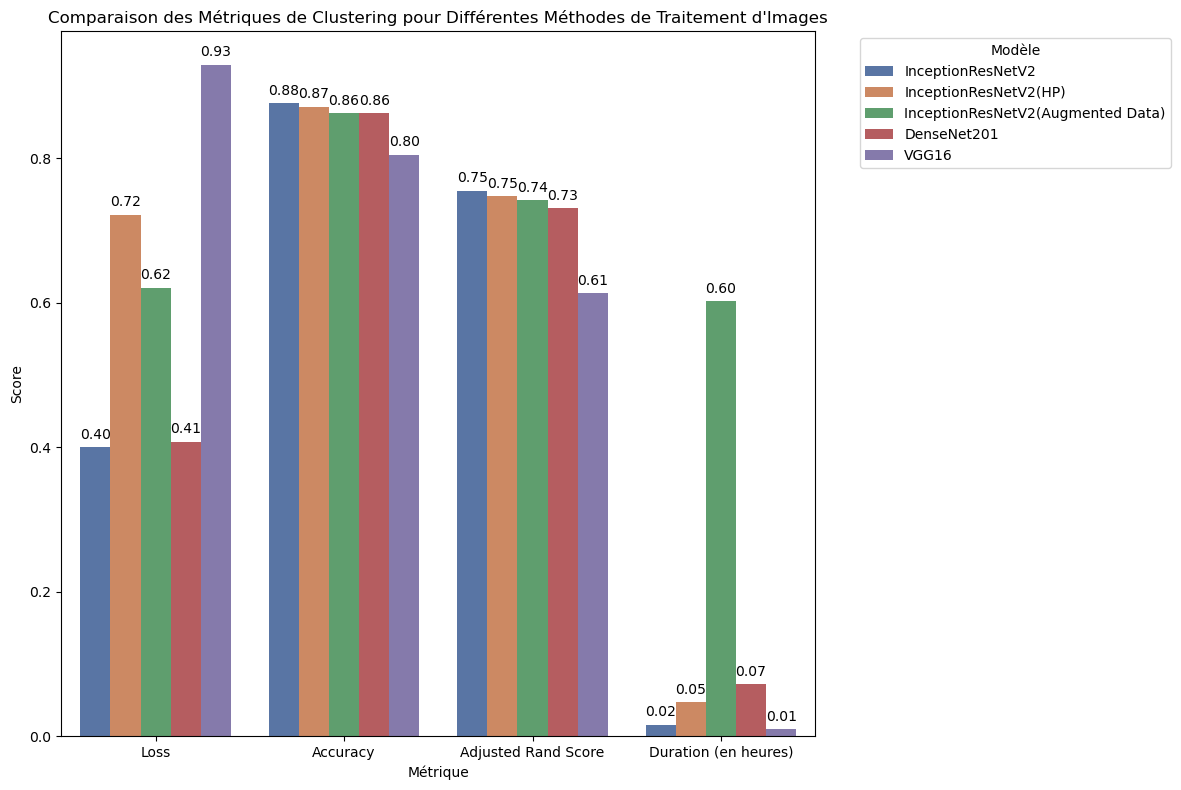

In [40]:
plot_model_performance(data_metrics)

### IA Generative

Utilisation de Copilot et du prompt :
"Créez une image haute résolution de [objet] sur un fond strictement blanc. Le sujet doit être vu de côté, montrant ses formes et caractéristiques distinctives. Assurez-vous que l'éclairage est parfaitement uniforme pour éliminer toutes les ombres sur le sujet et le fond. Le fond doit rester complètement blanc, sans nuances, textures ou autres éléments. L'image doit mettre en valeur uniquement le sujet, idéal pour des présentations de produit."

In [203]:
# Répertoires correspondant aux catégories
repertoires = {
    'Home Furnishing': "./data/Sources/generatedimages/homefurnishing",
    'Baby Care': "./data/Sources/generatedimages/baby",
    'Watches': "./data/Sources/generatedimages/watches",
    'Home Decor & Festive Needs': "./data/Sources/generatedimages/homedecor",
    'Kitchen & Dining': "./data/Sources/generatedimages/kitchen",
    'Beauty and Personal Care': "./data/Sources/generatedimages/beauty",
    'Computers': "./data/Sources/generatedimages/computers"
}

In [207]:
# Initialisation des listes pour les chemins d'image et les étiquettes
paths_train_gen = paths_train.copy()
y_train_gen = y_train.copy()

In [208]:
# Obtenir les catégories dans l'ordre d'encodage
categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Parcourir tous les répertoires
for categorie, repertoire in repertoires.items():
    # Récupérer l'indice de la catégorie dans l'encodage des catégories
    index_categorie = label_encoder.transform([categorie])[0]

    # Parcourir les images dans le répertoire
    for img in os.listdir(repertoire):
        # Créer le chemin complet de l'image
        chemin_image = os.path.join(repertoire, img)

        # Ajouter le chemin de l'image
        paths_train_gen.append(chemin_image)

        # Créer l'étiquette correspondante pour cette catégorie
        y_imggen_train = np.zeros(7)
        y_imggen_train[index_categorie] = 1

        # Ajouter l'étiquette
        y_train_gen = np.vstack([y_train_gen, y_imggen_train])

# Convertir les listes en tableaux numpy
paths_train_gen = np.array(paths_train_gen)

In [209]:
# Préparation des données
X_train_iresnetv2_ad, X_val_iresnetv2_ad, X_test_iresnetv2_ad = prepare_data(paths_train_gen, paths_val,
                                                                             paths_test, preprocess_inceptionresnetv2,
                                                                             target_size=(299, 299, 3))

In [210]:
# Création du modèle
model_iresnetv2_ad = create_model_fct(base_model_name='InceptionResNetV2')

In [211]:
# Entraînement du modèle
model_iresnetv2_ad, history_iresnetv2_ad, duration_iresnetv2_ad = train_model(model_iresnetv2_ad, X_train_iresnetv2_ad,
                                                                      y_train_gen, X_val_iresnetv2_ad, y_val,
                                                                      model_save_path="./model_iresnetv2_ad_best.weights.h5")

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4697 - loss: 1.6557
Epoch 1: val_loss improved from inf to 0.78960, saving model to ./model_iresnetv2_ad_best.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4767 - loss: 1.6363 - val_accuracy: 0.7810 - val_loss: 0.7896
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8234 - loss: 0.6065
Epoch 2: val_loss improved from 0.78960 to 0.52562, saving model to ./model_iresnetv2_ad_best.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8238 - loss: 0.6058 - val_accuracy: 0.8286 - val_loss: 0.5256
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8621 - loss: 0.4359
Epoch 3: val_loss did not improve from 0.52562
24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8620 - loss: 0.4366 - val_accuracy: 0.8286 - val_loss: 0.5435
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8904 - loss: 0.3737
Epoch 4: val_loss improved from 0.52562 to 0.46198, saving model to ./

In [212]:
# Évaluation du modèle
loss_iresnetv2_ad, accuracy_iresnetv2_ad, ari_score_iresnetv2_ad = evaluate_model(model_iresnetv2_ad,
                                                                                  X_train_iresnetv2_ad,
                                                                                  y_train_gen, X_val_iresnetv2_ad,
                                                                                  y_val, X_test_iresnetv2_ad,
                                                                                  y_test,
                                                                                  best_weights_path="./model_iresnetv2_ad_best.weights.h5")

24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9386 - loss: 0.1319
Training Accuracy after last epoch: 0.9431

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8332 - loss: 0.6436
Test Accuracy after last epoch: 0.8381

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8494 - loss: 0.3896
Validation Accuracy (best): 0.8524
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8993 - loss: 0.4013
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
Adjusted Rand Index (ARI): 0.7823


In [213]:
add_results('InceptionResNetV2(Augmented Data v2)', loss_iresnetv2_ad, accuracy_iresnetv2_ad,
            ari_score_iresnetv2_ad, duration_iresnetv2_ad)
data_metrics = pd.DataFrame(data_results)

In [214]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.929100
1,VGG16,Accuracy,0.804762
2,VGG16,Adjusted Rand Score,0.613075
3,VGG16,Duration (en heures),0.009636
4,InceptionResNetV2,Loss,0.400183
5,InceptionResNetV2,Accuracy,0.876190
6,InceptionResNetV2,Adjusted Rand Score,0.754794
7,InceptionResNetV2,Duration (en heures),0.015675
8,DenseNet201,Loss,0.407489
9,DenseNet201,Accuracy,0.861905


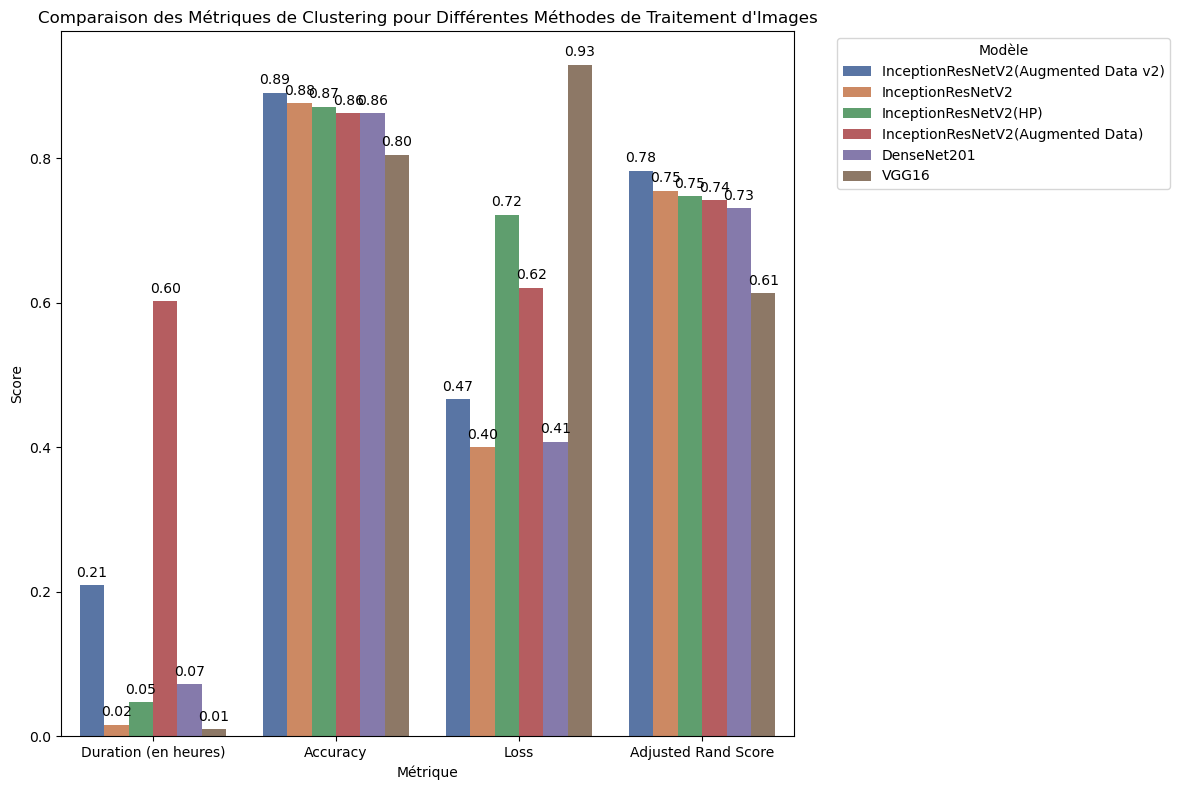

In [215]:
plot_model_performance(data_metrics)